In [147]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from statsmodels.stats.outliers_influence import variance_inflation_factor
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
df= pd.read_csv('cancer_mortality.csv')

# EDA

In [3]:
df.head()

# Having first glance of data:

,avgAnnCount,avgDeathsPerYear,TARGET_deathRate,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,binnedInc,MedianAge,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,1397.0,469,164.9,489.8,61898.0,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127.0,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348.0,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243.0,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955.0,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              3047 non-null   float64
 1   avgDeathsPerYear         3047 non-null   int64  
 2   TARGET_deathRate         3047 non-null   float64
 3   incidenceRate            3047 non-null   float64
 4   medIncome                3046 non-null   float64
 5   popEst2015               3047 non-null   int64  
 6   povertyPercent           3047 non-null   float64
 7   studyPerCap              3047 non-null   float64
 8   binnedInc                3047 non-null   object 
 9   MedianAge                3047 non-null   float64
 10  MedianAgeMale            3047 non-null   float64
 11  MedianAgeFemale          3047 non-null   float64
 12  Geography                3047 non-null   object 
 13  AvgHouseholdSize         3047 non-null   float64
 14  PercentMarried          

In [5]:
# Check the dimensions of the dataset
print("Shape of the dataset:", df.shape)

# Check the data types of the columns
print("\nData types of the columns:\n", df.dtypes)



Shape of the dataset: (3047, 34)

Data types of the columns:
 avgAnnCount                float64
avgDeathsPerYear             int64
TARGET_deathRate           float64
incidenceRate              float64
medIncome                  float64
popEst2015                   int64
povertyPercent             float64
studyPerCap                float64
binnedInc                   object
MedianAge                  float64
MedianAgeMale              float64
MedianAgeFemale            float64
Geography                   object
AvgHouseholdSize           float64
PercentMarried             float64
PctNoHS18_24               float64
PctHS18_24                 float64
PctSomeCol18_24            float64
PctBachDeg18_24            float64
PctHS25_Over               float64
PctBachDeg25_Over          float64
PctEmployed16_Over         float64
PctUnemployed16_Over       float64
PctPrivateCoverage         float64
PctPrivateCoverageAlone    float64
PctEmpPrivCoverage         float64
PctPublicCoverage          f

In [6]:
# Check for any duplicates
print("\nNumber of duplicates:", df.duplicated().sum())




Number of duplicates: 0


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
avgAnnCount,3047.0,606.338544,1416.356223,6.000000,76.000000,171.000000,518.000000,3.815000e+04
avgDeathsPerYear,3047.0,185.965868,504.134286,3.000000,28.000000,61.000000,149.000000,1.401000e+04
TARGET_deathRate,3047.0,178.664063,27.751511,59.700000,161.200000,178.100000,195.200000,3.628000e+02
incidenceRate,3047.0,448.268586,54.560733,201.300000,420.300000,453.549422,480.850000,1.206900e+03
medIncome,3046.0,47061.982272,12041.853935,22640.000000,38880.250000,45201.000000,52492.500000,1.256350e+05
popEst2015,3047.0,102637.370528,329059.220504,827.000000,11684.000000,26643.000000,68671.000000,1.017029e+07
povertyPercent,3047.0,16.878175,6.409087,3.200000,12.150000,15.900000,20.400000,4.740000e+01
studyPerCap,3047.0,155.399415,529.628366,0.000000,0.000000,0.000000,83.650776,9.762309e+03
MedianAge,3047.0,45.272333,45.304480,22.300000,37.700000,41.000000,44.000000,6.240000e+02
MedianAgeMale,3047.0,39.570725,5.226017,22.400000,36.350000,39.600000,42.500000,6.470000e+01


# Visualization


<AxesSubplot:ylabel='avgAnnCount'>

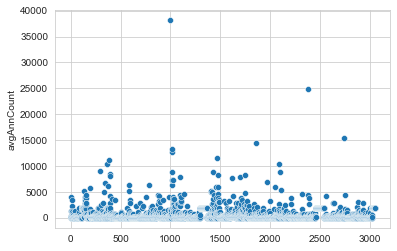

In [122]:
sns.scatterplot(x=df.index, y=df['avgAnnCount'])

<AxesSubplot:ylabel='avgDeathsPerYear'>

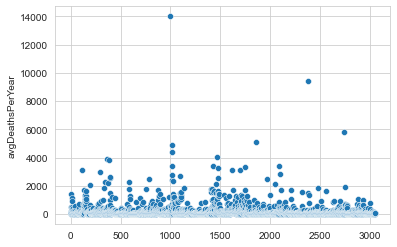

In [123]:
sns.scatterplot(x=df.index, y=df['avgDeathsPerYear'])

<AxesSubplot:ylabel='TARGET_deathRate'>

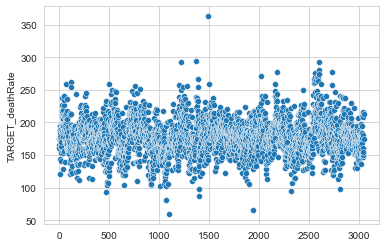

In [124]:
sns.scatterplot(x=df.index, y=df['TARGET_deathRate'])

<AxesSubplot:ylabel='incidenceRate'>

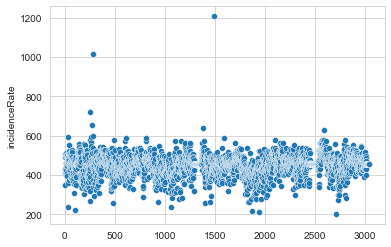

In [125]:
sns.scatterplot(x=df.index, y=df['incidenceRate'])

<AxesSubplot:ylabel='incidenceRate'>

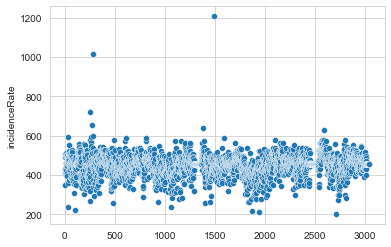

In [126]:
sns.scatterplot(x=df.index, y=df['incidenceRate'])

<AxesSubplot:ylabel='medIncome'>

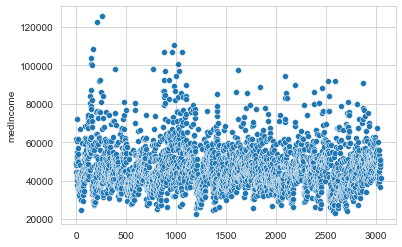

In [127]:
sns.scatterplot(x=df.index, y=df['medIncome'])

<AxesSubplot:ylabel='popEst2015'>

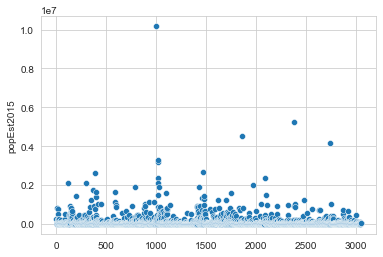

In [128]:
sns.scatterplot(x=df.index, y=df['popEst2015'])

<AxesSubplot:ylabel='povertyPercent'>

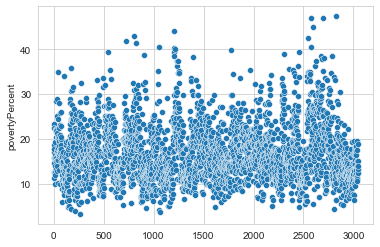

In [129]:
sns.scatterplot(x=df.index, y=df['povertyPercent'])

<AxesSubplot:ylabel='studyPerCap'>

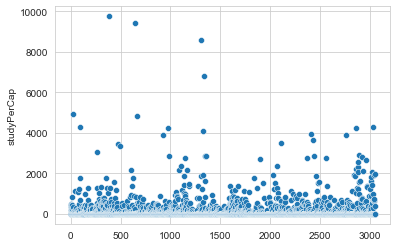

In [130]:
sns.scatterplot(x=df.index, y=df['studyPerCap'])

<AxesSubplot:ylabel='PctMarriedHouseholds'>

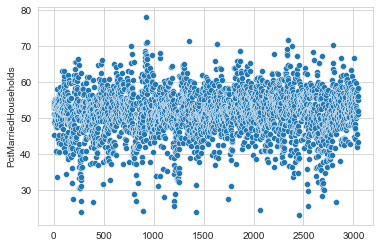

In [131]:
sns.scatterplot(x=df.index, y=df['PctMarriedHouseholds'])

<AxesSubplot:ylabel='PctOtherRace'>

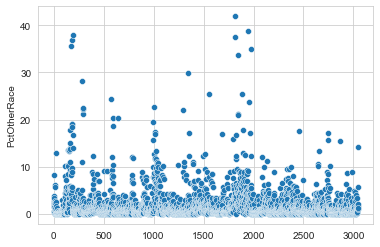

In [132]:
sns.scatterplot(x=df.index, y=df['PctOtherRace'])

In [133]:
corr = df2.corr()['TARGET_deathRate'].sort_values()



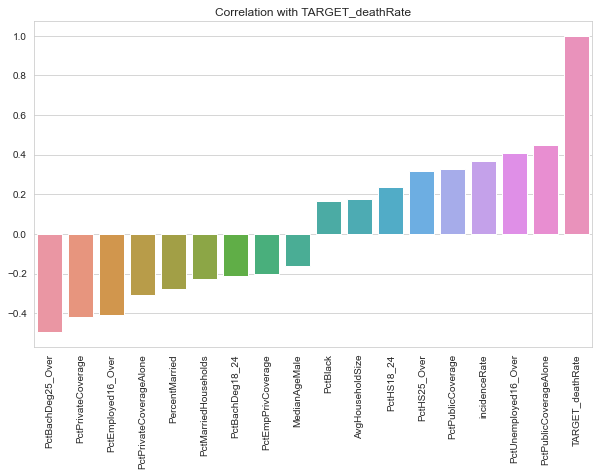

In [134]:
# plot correlation coefficients
plt.figure(figsize=(10, 6))
sns.barplot(x=corr.index, y=corr.values)
plt.xticks(rotation=90)
plt.title('Correlation with TARGET_deathRate')
plt.show()

<AxesSubplot:>

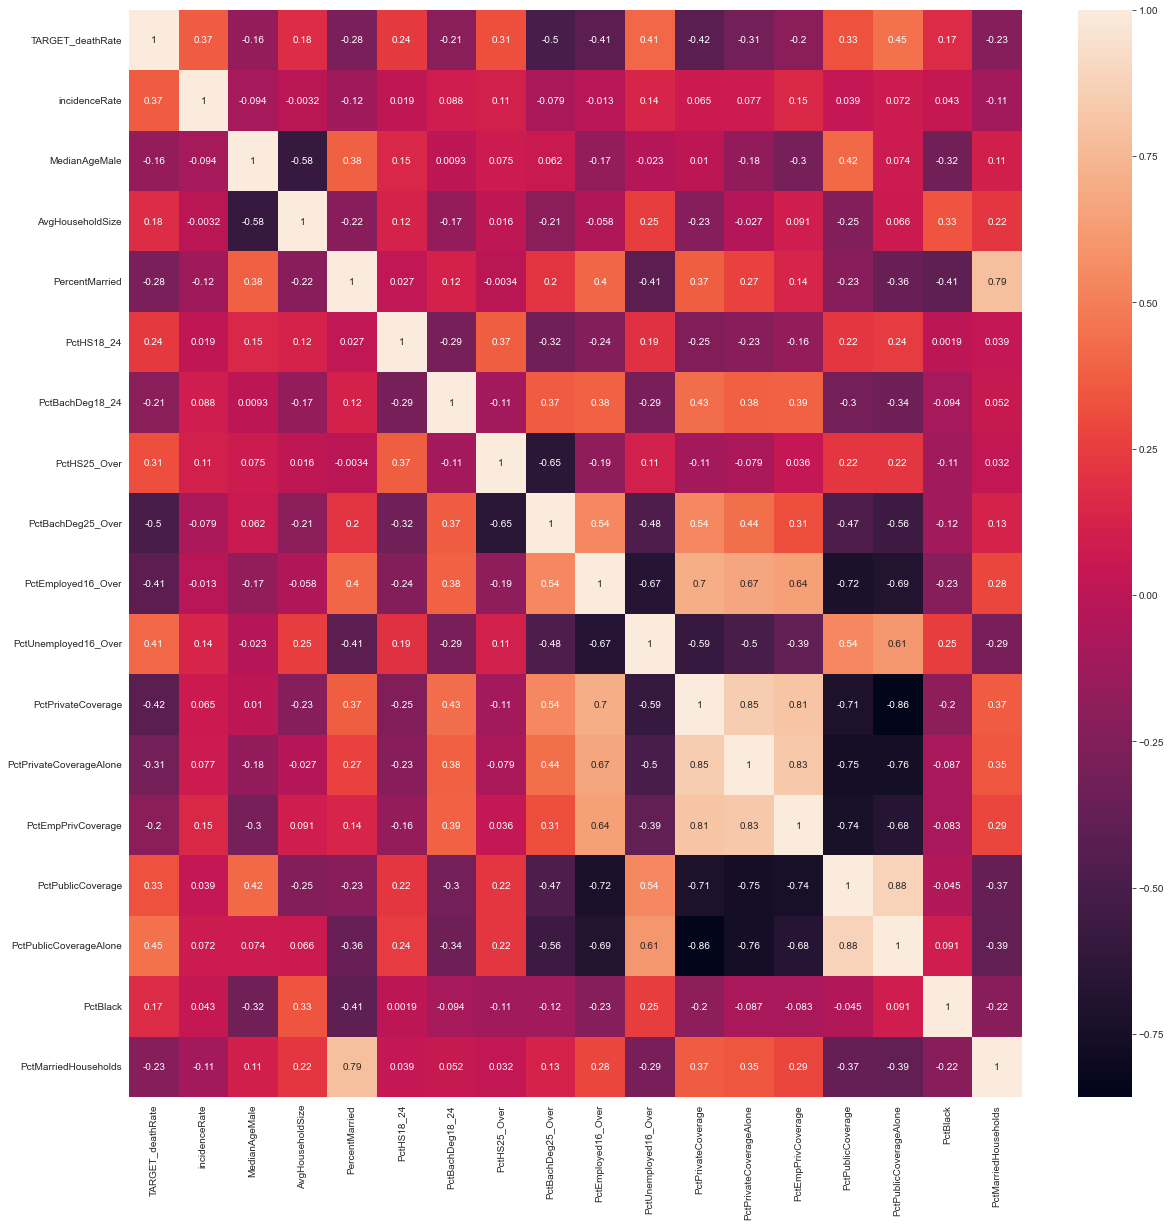

In [136]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

sns.heatmap(df2.corr(),annot=True)

# Handling Outliers

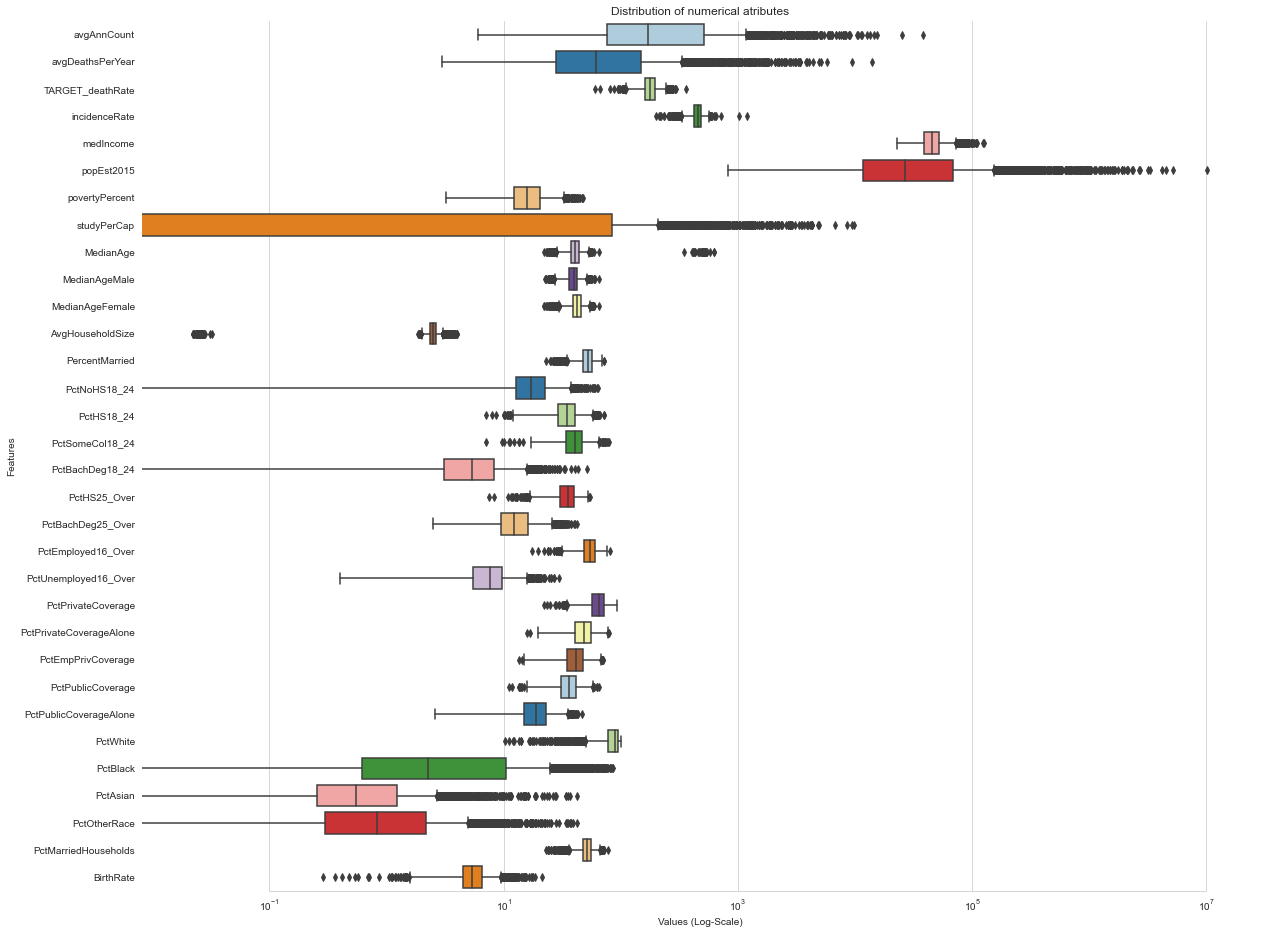

In [8]:
# Creating a list of dataframe columns which are numeric:
num_features = df.select_dtypes(include=[np.number]).columns.tolist()

# Creating a list of dataframe columns which are numeric:
num_features = df.select_dtypes(include=[np.number]).columns.tolist()

li_not_plot = ['binnedInc', 'Geography']
li_plot_num_feats = [c for c in list(num_features) if c not in li_not_plot]


# Boxplot for the numerical features against the target sales price variable:

sns.set_style("whitegrid")
f, ax = plt.subplots(figsize=(20, 16))
# Using log scale:
ax.set_xscale("log")
ax = sns.boxplot(data=df[li_plot_num_feats] , orient="h", palette="Paired")
ax.set(ylabel="Features")
ax.set(xlabel="Values (Log-Scale)")
ax.set(title="Distribution of numerical atributes")
sns.despine(trim=True, left=True)
li_plot_num_feats = [c for c in list(num_features) if c not in li_not_plot]



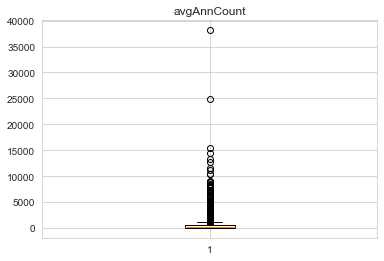

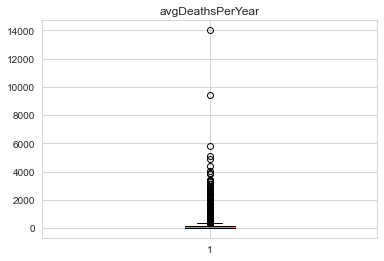

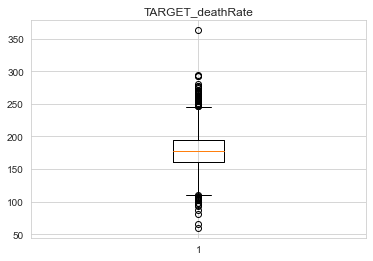

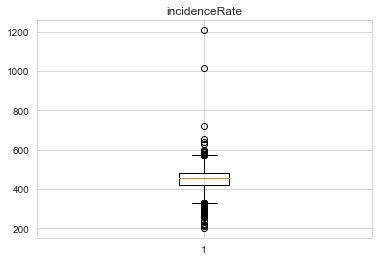

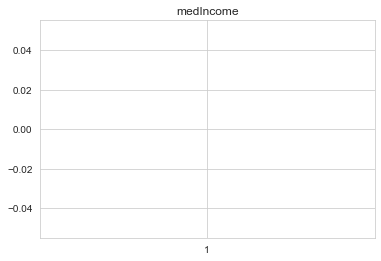

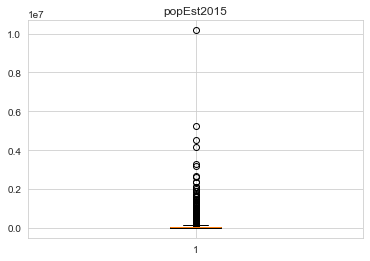

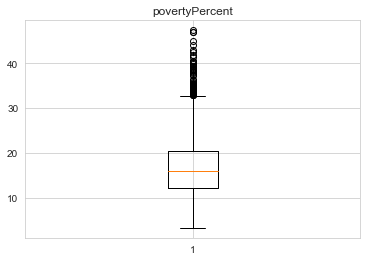

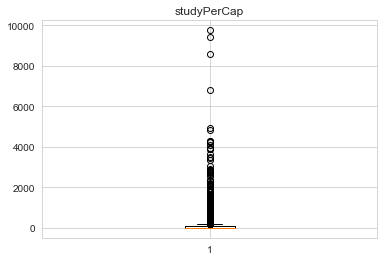

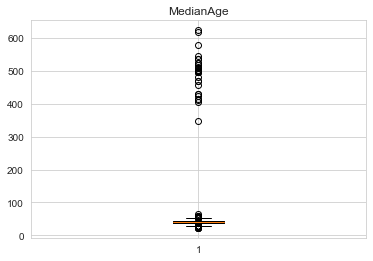

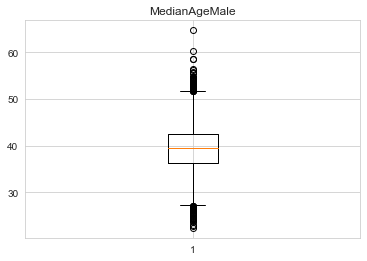

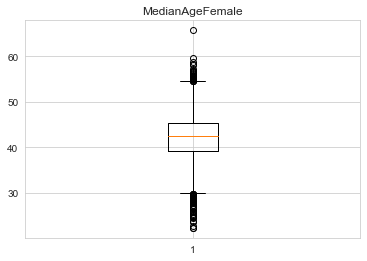

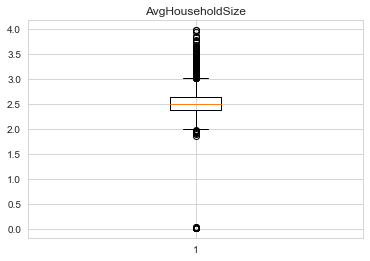

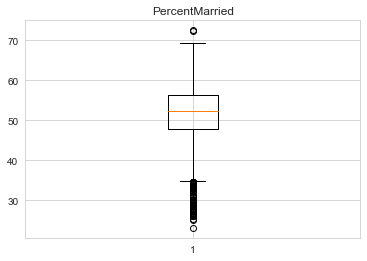

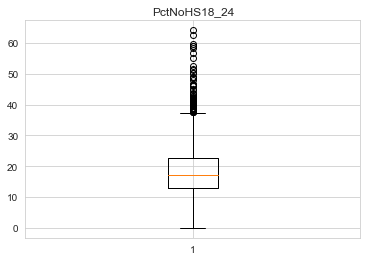

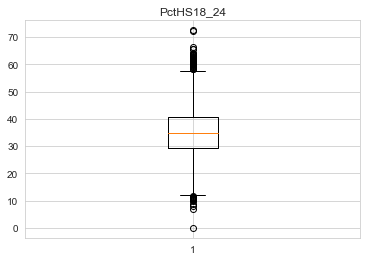

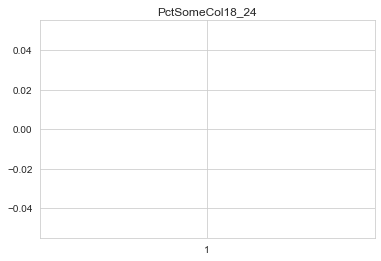

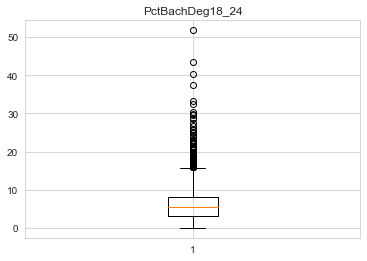

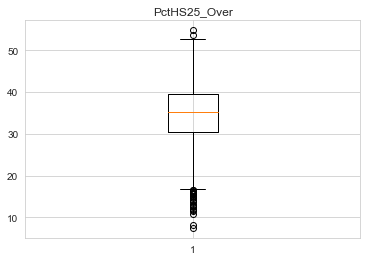

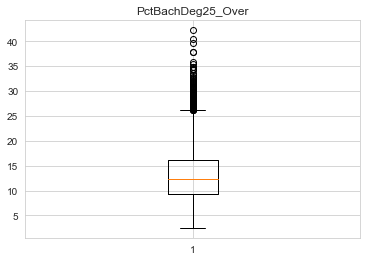

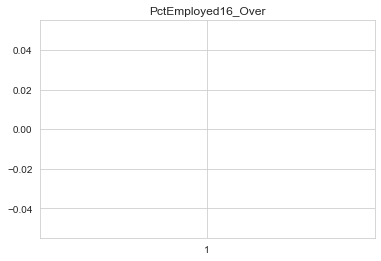

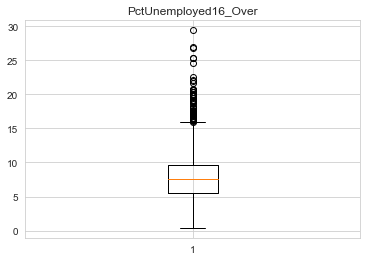

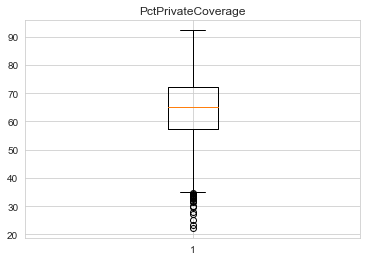

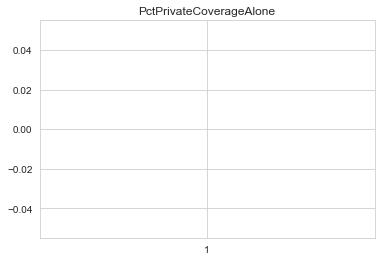

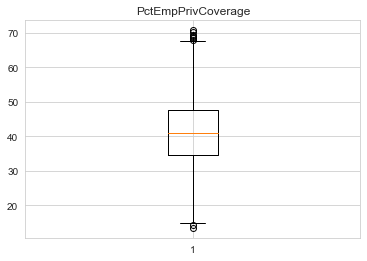

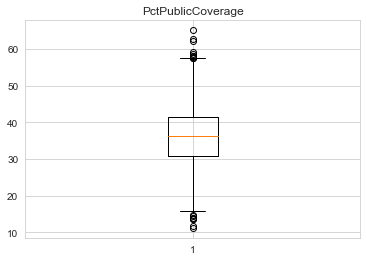

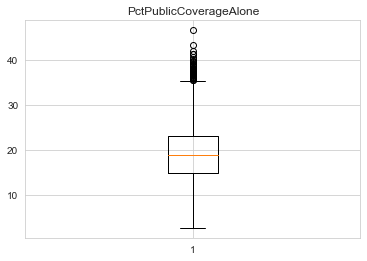

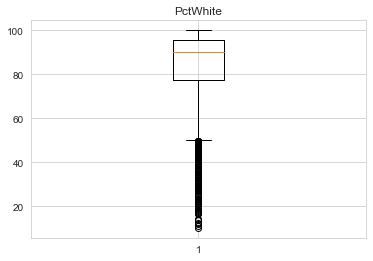

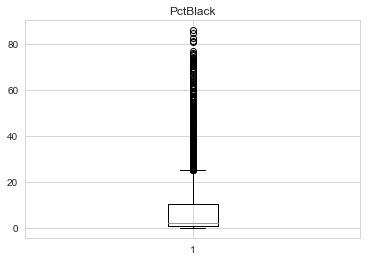

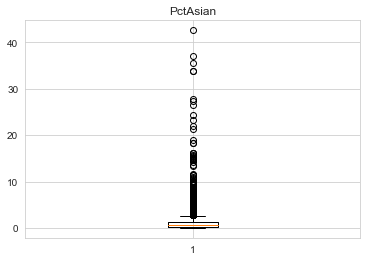

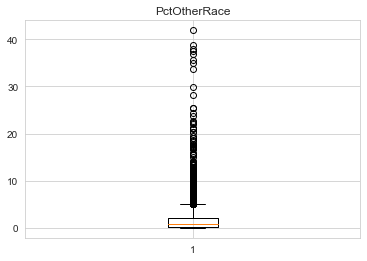

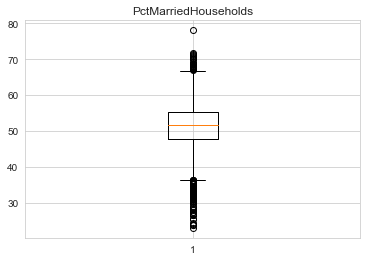

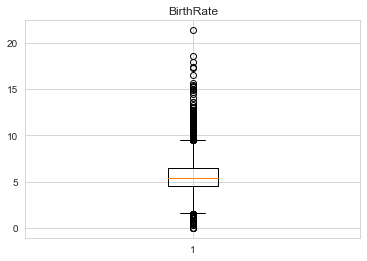

In [9]:
# create a boxplot for each numerical column
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    plt.boxplot(df[column])
    plt.title(column)

plt.show()

In [10]:
# identify outliers using IQR method
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
data_no_outliers = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("Original dataset shape:", df.shape)
print("Dataset shape after removing outliers:", data_no_outliers.shape)

Original dataset shape: (3047, 34)
Dataset shape after removing outliers: (1229, 34)


In [11]:
## This code first calculates the IQR for each numerical column, and then identifies outliers
## as any data points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR. We then remove these
##  outliers using boolean indexing and create a new dataset without outliers.




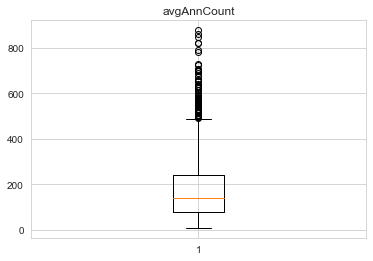

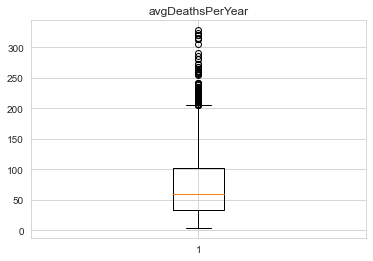

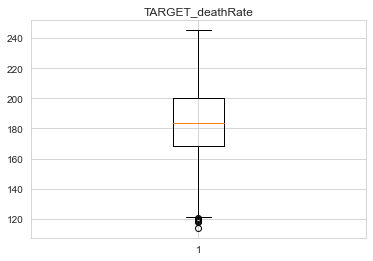

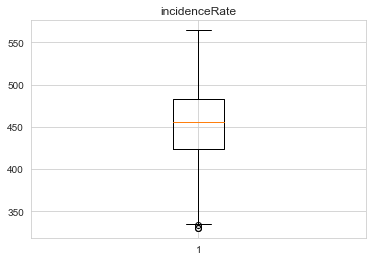

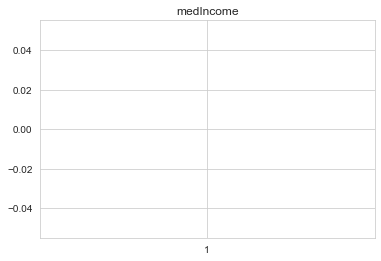

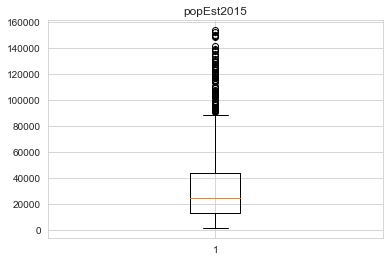

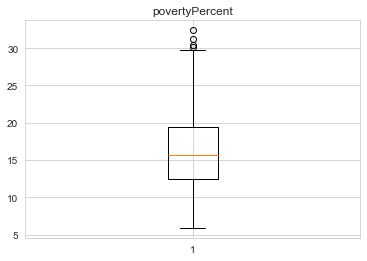

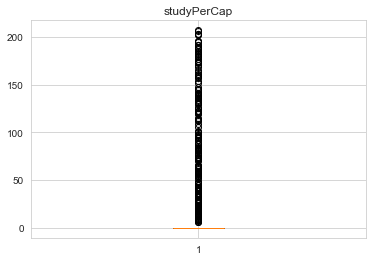

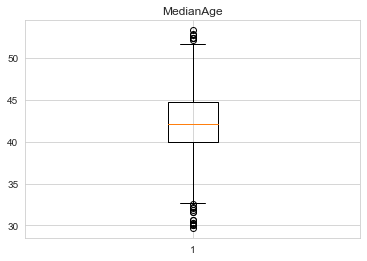

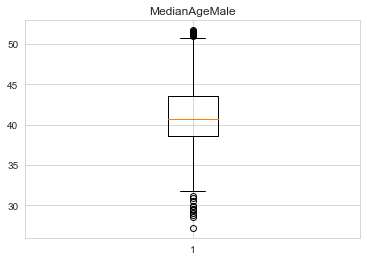

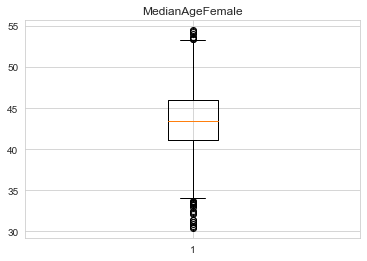

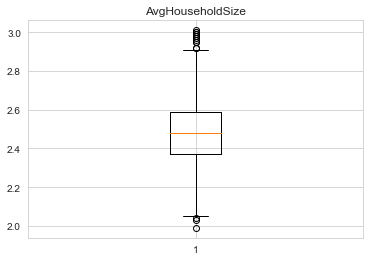

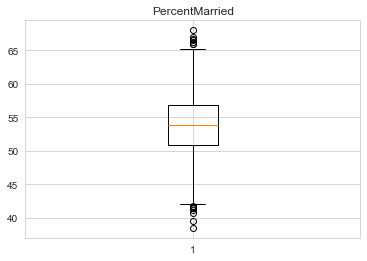

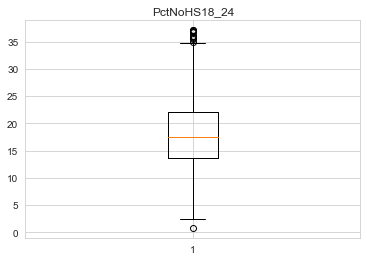

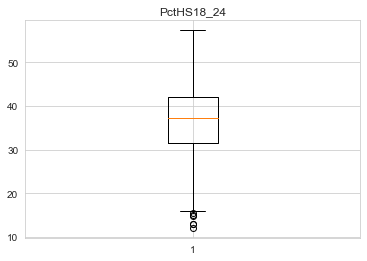

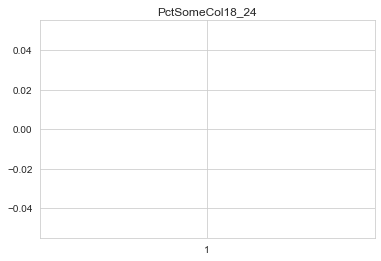

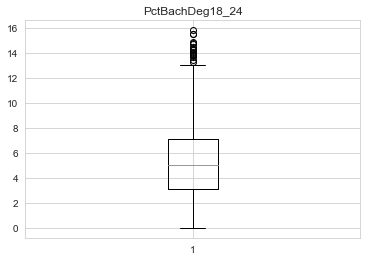

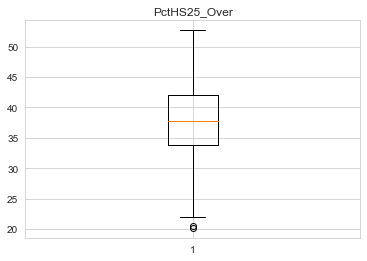

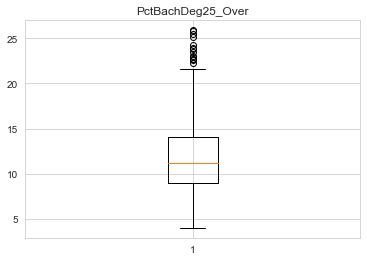

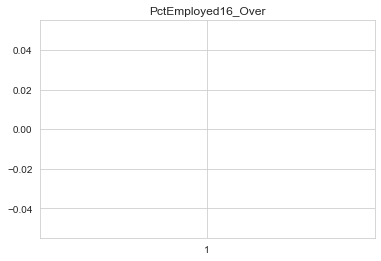

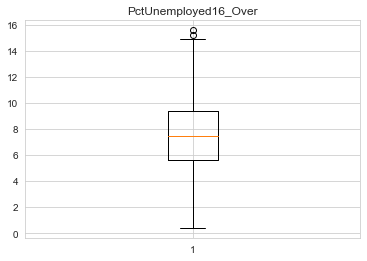

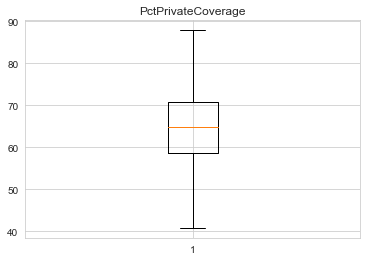

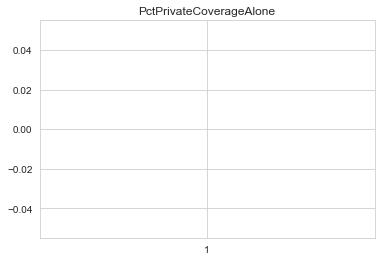

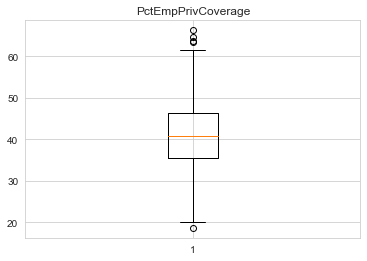

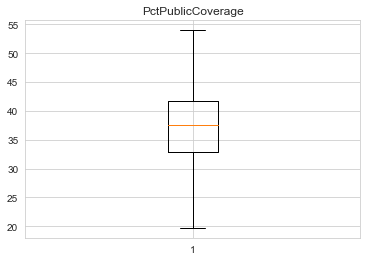

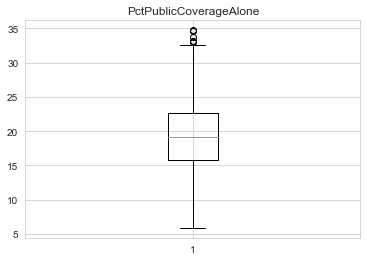

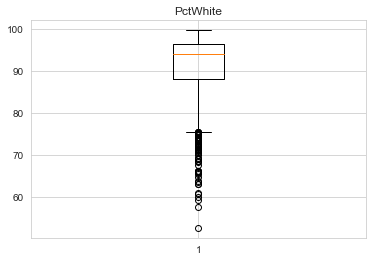

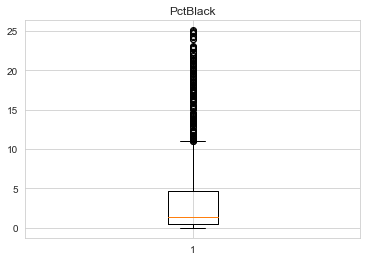

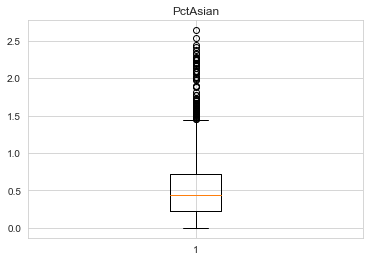

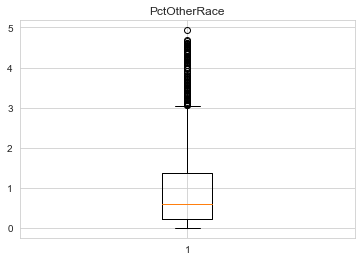

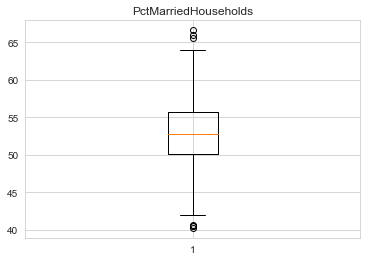

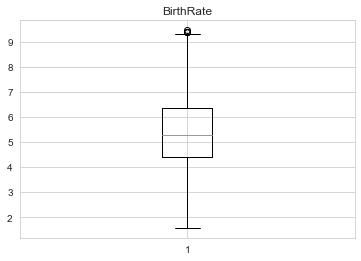

In [12]:
for column in data_no_outliers.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure()
    plt.boxplot(data_no_outliers[column])
    plt.title(column)

plt.show()

In [13]:
# we can see that the outliers have been handled 



In [14]:
df2= data_no_outliers

# Missing values

In [15]:
# count missing values for each column
print(df2.isnull().sum())

avgAnnCount                  0
avgDeathsPerYear             0
TARGET_deathRate             0
incidenceRate                0
medIncome                    1
popEst2015                   0
povertyPercent               0
studyPerCap                  0
binnedInc                    0
MedianAge                    0
MedianAgeMale                0
MedianAgeFemale              0
Geography                    0
AvgHouseholdSize             0
PercentMarried               0
PctNoHS18_24                 0
PctHS18_24                   0
PctSomeCol18_24            919
PctBachDeg18_24              0
PctHS25_Over                 0
PctBachDeg25_Over            0
PctEmployed16_Over          62
PctUnemployed16_Over         0
PctPrivateCoverage           0
PctPrivateCoverageAlone    248
PctEmpPrivCoverage           0
PctPublicCoverage            0
PctPublicCoverageAlone       0
PctWhite                     0
PctBlack                     0
PctAsian                     0
PctOtherRace                 0
PctMarri

In [16]:
# drop rows with missing values in 'medIncome' column since it has only 1 missing value
df2.dropna(subset=['medIncome'], inplace=True)

In [17]:
df2.fillna(df2.mean(), inplace=True)

In [18]:
# check now

print(df2.isnull().sum())

avgAnnCount                0
avgDeathsPerYear           0
TARGET_deathRate           0
incidenceRate              0
medIncome                  0
popEst2015                 0
povertyPercent             0
studyPerCap                0
binnedInc                  0
MedianAge                  0
MedianAgeMale              0
MedianAgeFemale            0
Geography                  0
AvgHouseholdSize           0
PercentMarried             0
PctNoHS18_24               0
PctHS18_24                 0
PctSomeCol18_24            0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctWhite                   0
PctBlack                   0
PctAsian                   0
PctOtherRace               0
PctMarriedHouseholds       0
BirthRate                  0
dtype: int64


In [19]:
# Success missing values have been handled

In [20]:
corr = df2.corr()['TARGET_deathRate'].sort_values()

In [21]:
# drop columns with low correlation
low_corr_cols = corr[corr.abs() < 0.15].index
df2.drop(low_corr_cols, axis=1, inplace=True)

In [22]:
df2.shape

(1228, 23)

In [23]:
## we have dropped variables with less than 0.15 correlation with the target variable
## we can see 11 features have been dropped

# Feature Engineering

In [25]:
# Create a new feature "Median_Age_Group"
bins = [0, 18, 35, 50, 65, 100]
labels = ['0-18', '18-35', '35-50', '50-65', '65+']
df2['Median_Age_Group'] = pd.cut(df2['MedianAge'], bins=bins, labels=labels)



In [26]:
# Create a new feature "Income_Group"
bins = [0, 25000, 50000, 75000, 100000, 1000000]
labels = ['<25K', '25-50K', '50-75K', '75-100K', '>100K']
df2['Income_Group'] = pd.cut(df2['medIncome'], bins=bins, labels=labels)



In [27]:
df2.povertyPercent.describe()

count    1228.000000
mean       16.096987
std         4.600678
min         5.900000
25%        12.400000
50%        15.700000
75%        19.425000
max        32.400000
Name: povertyPercent, dtype: float64

In [28]:
# Create a new feature "Poverty_Group"
bins = [0, 10, 20, 30, 40, 100]
labels = ['0-10%', '10-20%', '20-30%', '30-40%', '>40%']
df2['Poverty_Group'] = pd.cut(df2['povertyPercent'], bins=bins, labels=labels)



In [29]:
# Drop unnecessary columns
df2 = df2.drop(['MedianAge', 'medIncome', 'povertyPercent'], axis=1)

In [30]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1228 entries, 1 to 3017
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   TARGET_deathRate         1228 non-null   float64 
 1   incidenceRate            1228 non-null   float64 
 2   binnedInc                1228 non-null   object  
 3   MedianAgeMale            1228 non-null   float64 
 4   Geography                1228 non-null   object  
 5   AvgHouseholdSize         1228 non-null   float64 
 6   PercentMarried           1228 non-null   float64 
 7   PctHS18_24               1228 non-null   float64 
 8   PctBachDeg18_24          1228 non-null   float64 
 9   PctHS25_Over             1228 non-null   float64 
 10  PctBachDeg25_Over        1228 non-null   float64 
 11  PctEmployed16_Over       1228 non-null   float64 
 12  PctUnemployed16_Over     1228 non-null   float64 
 13  PctPrivateCoverage       1228 non-null   float64 
 14  PctPriva

In [31]:
## One hot encoding creates many columns when there are a large number of categories in a feature, even when they 
## have no order. This can lead to a problem known as the curse of dimensionality, where the model can become
## overfit and perform poorly on new data.

# In this case, an alternative encoding technique that can be used is called "Hashing Encoding", 
# which is a type of feature hashing. Hashing encoding is a dimensionality reduction technique that maps each 
# category to a fixed number of bins using a hash function. This reduces the number of columns required
# for encoding and can help to mitigate the curse of dimensionality.

In [32]:
# perform hashing encoding on the Geography feature
encoder = ce.HashingEncoder(cols=['Geography'], n_components=8)
data_encoded = encoder.fit_transform(df2)

# print the first five rows of the encoded data
print(data_encoded.head())

   col_0  col_1  col_2  col_3  col_4  col_5  col_6  col_7  TARGET_deathRate  \
1      1      0      0      0      0      0      0      0             161.3   
2      1      0      0      0      0      0      0      0             174.7   
4      0      1      0      0      0      0      0      0             144.4   
5      0      0      0      0      0      1      0      0             176.0   
7      0      0      0      0      1      0      0      0             183.6   

   incidenceRate  ... PctPrivateCoverage  PctPrivateCoverageAlone  \
1          411.6  ...               70.2                     53.8   
2          349.7  ...               63.7                     43.5   
4          350.1  ...               61.6                     43.9   
5          505.4  ...               60.0                     38.8   
7          404.0  ...               55.8                     33.1   

   PctEmpPrivCoverage  PctPublicCoverage  PctPublicCoverageAlone  PctBlack  \
1                43.6           

In [34]:
df3= data_encoded

In [41]:
# Replace any parentheses, brackets, or commas with an empty string
df['binnedInc'] = df['binnedInc'].str.replace('(','').str.replace(')','').str.replace('[','').str.replace(']','').str.replace(',','')



In [42]:
# Remove any spaces from binnedInc
df3['binnedInc'] = df3['binnedInc'].str.replace(' ', '')


In [ ]:
# Split binnedInc into two columns
df3[['income_min', 'income_max']] = df3['binnedInc'].str.split(',', expand=True).astype(float)

In [46]:
# Drop the binnedInc column
df3.drop('binnedInc', axis=1, inplace=True)

In [47]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1228 entries, 1 to 3017
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   col_0                    1228 non-null   int64   
 1   col_1                    1228 non-null   int64   
 2   col_2                    1228 non-null   int64   
 3   col_3                    1228 non-null   int64   
 4   col_4                    1228 non-null   int64   
 5   col_5                    1228 non-null   int64   
 6   col_6                    1228 non-null   int64   
 7   col_7                    1228 non-null   int64   
 8   TARGET_deathRate         1228 non-null   float64 
 9   incidenceRate            1228 non-null   float64 
 10  MedianAgeMale            1228 non-null   float64 
 11  AvgHouseholdSize         1228 non-null   float64 
 12  PercentMarried           1228 non-null   float64 
 13  PctHS18_24               1228 non-null   float64 
 14  PctBachD

In [48]:
df4= df3

In [49]:
df5= df3

In [ ]:
# encoding the newly created variables 

In [50]:
df4['Median_Age_Group_Code'] = df4['Median_Age_Group'].cat.codes


In [56]:
df4['Income_group_Code'] = df4['Income_Group'].cat.codes


In [58]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1228 entries, 1 to 3017
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   col_0                    1228 non-null   int64   
 1   col_1                    1228 non-null   int64   
 2   col_2                    1228 non-null   int64   
 3   col_3                    1228 non-null   int64   
 4   col_4                    1228 non-null   int64   
 5   col_5                    1228 non-null   int64   
 6   col_6                    1228 non-null   int64   
 7   col_7                    1228 non-null   int64   
 8   TARGET_deathRate         1228 non-null   float64 
 9   incidenceRate            1228 non-null   float64 
 10  MedianAgeMale            1228 non-null   float64 
 11  AvgHouseholdSize         1228 non-null   float64 
 12  PercentMarried           1228 non-null   float64 
 13  PctHS18_24               1228 non-null   float64 
 14  PctBachD

In [59]:
df4

count    1228.000000
mean        1.274430
std         0.446408
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         2.000000
Name: Income_group, dtype: float64

In [60]:
df3.drop(['Income_group',], axis=1, inplace=True)

In [61]:
df4.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1228 entries, 1 to 3017
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   col_0                    1228 non-null   int64   
 1   col_1                    1228 non-null   int64   
 2   col_2                    1228 non-null   int64   
 3   col_3                    1228 non-null   int64   
 4   col_4                    1228 non-null   int64   
 5   col_5                    1228 non-null   int64   
 6   col_6                    1228 non-null   int64   
 7   col_7                    1228 non-null   int64   
 8   TARGET_deathRate         1228 non-null   float64 
 9   incidenceRate            1228 non-null   float64 
 10  MedianAgeMale            1228 non-null   float64 
 11  AvgHouseholdSize         1228 non-null   float64 
 12  PercentMarried           1228 non-null   float64 
 13  PctHS18_24               1228 non-null   float64 
 14  PctBachD

In [62]:
df3.drop(['Income_Group',], axis=1, inplace=True)

In [63]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1228 entries, 1 to 3017
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   col_0                    1228 non-null   int64   
 1   col_1                    1228 non-null   int64   
 2   col_2                    1228 non-null   int64   
 3   col_3                    1228 non-null   int64   
 4   col_4                    1228 non-null   int64   
 5   col_5                    1228 non-null   int64   
 6   col_6                    1228 non-null   int64   
 7   col_7                    1228 non-null   int64   
 8   TARGET_deathRate         1228 non-null   float64 
 9   incidenceRate            1228 non-null   float64 
 10  MedianAgeMale            1228 non-null   float64 
 11  AvgHouseholdSize         1228 non-null   float64 
 12  PercentMarried           1228 non-null   float64 
 13  PctHS18_24               1228 non-null   float64 
 14  PctBachD

In [64]:
df3.drop(['Median_Age_Group',], axis=1, inplace=True)

In [66]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Separate the target variable
y = df4['TARGET_deathRate']

# Separate the features
X = df4.drop(['TARGET_deathRate'], axis=1)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Concatenate the scaled features with the target variable
df_scaled = pd.concat([pd.DataFrame(X_scaled, columns=X.columns), y], axis=1)


In [67]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1228 entries, 1 to 3017
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   col_0                    1228 non-null   int64  
 1   col_1                    1228 non-null   int64  
 2   col_2                    1228 non-null   int64  
 3   col_3                    1228 non-null   int64  
 4   col_4                    1228 non-null   int64  
 5   col_5                    1228 non-null   int64  
 6   col_6                    1228 non-null   int64  
 7   col_7                    1228 non-null   int64  
 8   TARGET_deathRate         1228 non-null   float64
 9   incidenceRate            1228 non-null   float64
 10  MedianAgeMale            1228 non-null   float64
 11  AvgHouseholdSize         1228 non-null   float64
 12  PercentMarried           1228 non-null   float64
 13  PctHS18_24               1228 non-null   float64
 14  PctBachDeg18_24         

In [68]:
df4.isnull().sum()

col_0                      0
col_1                      0
col_2                      0
col_3                      0
col_4                      0
col_5                      0
col_6                      0
col_7                      0
TARGET_deathRate           0
incidenceRate              0
MedianAgeMale              0
AvgHouseholdSize           0
PercentMarried             0
PctHS18_24                 0
PctBachDeg18_24            0
PctHS25_Over               0
PctBachDeg25_Over          0
PctEmployed16_Over         0
PctUnemployed16_Over       0
PctPrivateCoverage         0
PctPrivateCoverageAlone    0
PctEmpPrivCoverage         0
PctPublicCoverage          0
PctPublicCoverageAlone     0
PctBlack                   0
PctMarriedHouseholds       0
Poverty_Group              0
Median_Age_Group_Code      0
Income_group_Code          0
dtype: int64

# Model Building

In [69]:

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# build a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# build a random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# build an XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# calculate the RMSE and adjusted RMSE for the linear regression model
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_adj_rmse = lr_rmse * np.sqrt((len(y_test) - 1) / (len(y_test) - len(X_test.columns) - 1))

# calculate the RMSE and adjusted RMSE for the random forest model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_adj_rmse = rf_rmse * np.sqrt((len(y_test) - 1) / (len(y_test) - len(X_test.columns) - 1))

# calculate the RMSE and adjusted RMSE for the XGBoost model
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_adj_rmse = xgb_rmse * np.sqrt((len(y_test) - 1) / (len(y_test) - len(X_test.columns) - 1))

# print the results
print('Linear Regression RMSE:', lr_rmse)
print('Linear Regression Adjusted RMSE:', lr_adj_rmse)
print('Random Forest RMSE:', rf_rmse)
print('Random Forest Adjusted RMSE:', rf_adj_rmse)
print('XGBoost RMSE:', xgb_rmse)
print('XGBoost Adjusted RMSE:', xgb_adj_rmse)


Linear Regression RMSE: 18.482129077806775
Linear Regression Adjusted RMSE: 19.638358066265802
Random Forest RMSE: 18.700191597101153
Random Forest Adjusted RMSE: 19.870062423307505
XGBoost RMSE: 19.822730954237954
XGBoost Adjusted RMSE: 21.062827052648807


In [71]:
lr_model.score(X_train,y_train)

0.4637525824734122

In [70]:
lr_model.score(X_test,y_test)

0.4237741462232796

In [72]:
rf_model.score(X_train,y_train)

0.9213329952664834

In [73]:
rf_model.score(X_test,y_test)

0.41009666083919205

In [74]:
xgb_model.score(X_train,y_train)

0.9996014584895515

In [75]:
xgb_model.score(X_test,y_test)

0.33714930636578244

In [135]:
### Gradientboosting regressor with 10 fold

In [77]:
# assuming you have your data in X and y variables
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [78]:
# define the model with desired hyperparameters
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)

In [80]:

# initialize an empty list to hold the cross-validation scores
scores = []

# loop through each fold of the cross-validation
for train_index, test_index in kf.split(X):
    
    
    
    # fit the model on the training data for this fold
    model.fit(X_train, y_train)
    
    # predict on the testing data for this fold
    y_pred = model.predict(X_test)
    
    # calculate the mean squared error for this fold
    mse = mean_squared_error(y_test, y_pred)
    
    # append the score to the list of scores
    scores.append(mse)

# calculate the mean and standard deviation of the scores
mean_score = np.mean(scores)
std_score = np.std(scores)

# print the mean and standard deviation of the scores
print(f'Mean RMSE: {np.sqrt(mean_score):.2f}, Std RMSE: {np.sqrt(std_score):.2f}')


Mean RMSE: 18.30, Std RMSE: 0.89


In [81]:
model.score(X_train, y_train)

0.7276774541594875

In [84]:
model.score(X_test,y_test)

0.43209351052974887

In [86]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1228 entries, 1 to 3017
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   col_0                    1228 non-null   int64  
 1   col_1                    1228 non-null   int64  
 2   col_2                    1228 non-null   int64  
 3   col_3                    1228 non-null   int64  
 4   col_4                    1228 non-null   int64  
 5   col_5                    1228 non-null   int64  
 6   col_6                    1228 non-null   int64  
 7   col_7                    1228 non-null   int64  
 8   TARGET_deathRate         1228 non-null   float64
 9   incidenceRate            1228 non-null   float64
 10  MedianAgeMale            1228 non-null   float64
 11  AvgHouseholdSize         1228 non-null   float64
 12  PercentMarried           1228 non-null   float64
 13  PctHS18_24               1228 non-null   float64
 14  PctBachDeg18_24         

In [87]:
# Separate the target variable
A = df3['TARGET_deathRate']

# Separate the features
b = df3.drop(['TARGET_deathRate'], axis=1)

In [89]:
# split the data into training and testing sets
b_train, b_test, A_train, A_test = train_test_split(b,A , test_size=0.2, random_state=42)



In [92]:
# build a random forest model
rf_model1 = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model1.fit(b_train, A_train)
rf_pred1 = rf_model1.predict(b_test)



In [93]:
rf_model1.score(b_test,A_test)

0.41009666083919205

In [94]:
rf_model1.score(b_train,A_train)

0.9213329952664834

In [97]:
# build an XGBoost model
xgb_model1 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model1.fit(b_train, A_train)
xgb_pred = xgb_model1.predict(b_test)

In [98]:
xgb_model1.score(b_test,A_test)

0.33714930636578244

In [99]:
xgb_model1.score(b_train,A_train)

0.9996014584895515

In [ ]:
# lasso regression

In [100]:
# define the model with desired hyperparameters
modellasso = Lasso(alpha=0.1)

# fit the model on the training data
modellasso.fit(X_train, y_train)

# predict on the testing data
y_pred = modellasso.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# print the mean squared error
print(f'Mean squared error: {mse:.2f}')

Mean squared error: 337.33


In [101]:
modellasso.score(X_train,y_train)

0.4619026847416402

In [102]:
modellasso.score(X_test,y_test)

0.4309518310338273

In [ ]:
# Ridge regression

In [144]:
# define the model with desired hyperparameters
modelridge = Ridge(alpha=0.1)

# fit the model on the training data
modelridge.fit(X_train, y_train)

# predict on the testing data
y_pred1 = modelridge.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# print the mean squared error
print(f'Mean squared error: {mse:.2f}')

Mean squared error: 339.15


In [105]:
modelridge.score(X_train,y_train)

0.4637945569794506

In [106]:
modelridge.score(X_test,y_test)

0.4237723362981698

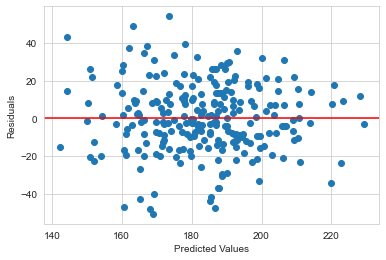

In [145]:
plt.scatter(y_pred1, y_test - y_pred1)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()


In [149]:
vif = pd.DataFrame()
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


                   Features         VIF
0                     col_0  340.495361
1                     col_1  342.240716
2                     col_2  393.635403
3                     col_3  370.994589
4                     col_4  284.446632
5                     col_5  331.890176
6                     col_6  274.084277
7                     col_7  393.268965
8             incidenceRate    1.159273
9             MedianAgeMale    3.847079
10         AvgHouseholdSize    4.116592
11           PercentMarried    7.370561
12               PctHS18_24    1.424922
13          PctBachDeg18_24    1.443224
14             PctHS25_Over    2.626738
15        PctBachDeg25_Over    3.673852
16       PctEmployed16_Over    4.798155
17     PctUnemployed16_Over    2.476237
18       PctPrivateCoverage   16.219417
19  PctPrivateCoverageAlone    5.182116
20       PctEmpPrivCoverage    7.627275
21        PctPublicCoverage   21.021427
22   PctPublicCoverageAlone   19.427094
23                 PctBlack    1.478320


In [112]:
elastic = ElasticNet()
# cross validation

# defining the model parameters for elasticnet:

#'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
# 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0]

parametersGrid = {'alpha': [0.0001, 0.001,0.002, 0.005, 0.01,
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1, 10, 100,200,500],
                   'l1_ratio':[0.01,0.1,0.5,0.6,0.7,0.8,0.9,0.95,0.96,0.98]}

model_cv = GridSearchCV(estimator=elastic, 
                        param_grid= parametersGrid,
                        scoring= 'neg_mean_squared_error', 
                        cv = 5, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 170 candidates, totalling 850 fits


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.002, 0.005, 0.01, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 1, 10, 100, 200,
                                   500],
                         'l1_ratio': [0.01, 0.1, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95,
                                      0.96, 0.98]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

In [113]:
cv_results_elastic = pd.DataFrame(model_cv.cv_results_)
cv_results_elastic.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.022014,0.002279,0.001981,0.000335,0.0001,0.01,"{'alpha': 0.0001, 'l1_ratio': 0.01}",-273.039141,-311.302843,-318.185541,...,-314.874273,27.219208,120,-303.914876,-292.924994,-291.960874,-293.225762,-282.215789,-292.848459,6.876849
1,0.025996,0.006743,0.002094,0.000462,0.0001,0.1,"{'alpha': 0.0001, 'l1_ratio': 0.1}",-273.039298,-311.302852,-318.185844,...,-314.874801,27.219738,121,-303.914874,-292.924992,-291.960872,-293.225760,-282.215786,-292.848457,6.876850
2,0.019948,0.007738,0.001937,0.000712,0.0001,0.5,"{'alpha': 0.0001, 'l1_ratio': 0.5}",-273.040011,-311.302968,-318.187214,...,-314.877176,27.222091,123,-303.914865,-292.924986,-291.960864,-293.225755,-282.215774,-292.848449,6.876851
3,0.014045,0.000929,0.001657,0.000160,0.0001,0.6,"{'alpha': 0.0001, 'l1_ratio': 0.6}",-273.040196,-311.303010,-318.187587,...,-314.877782,27.222679,124,-303.914864,-292.924985,-291.960863,-293.225754,-282.215772,-292.848448,6.876851
4,0.014502,0.001478,0.001574,0.000245,0.0001,0.7,"{'alpha': 0.0001, 'l1_ratio': 0.7}",-273.040388,-311.303057,-318.188017,...,-314.878403,27.223267,125,-303.914862,-292.924984,-291.960861,-293.225753,-282.215770,-292.848446,6.876851


In [ ]:
model_cv.score(X_train,y_train)

In [ ]:
## Elastic net

In [115]:
# define the model with desired hyperparameters
model4 = ElasticNet(alpha=0.1, l1_ratio=0.5)

# fit the model on the training data
model4.fit(X_train, y_train)

# predict on the testing data
y_pred = model4.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# print the mean squared error
print(f'Mean squared error: {mse:.2f}')

Mean squared error: 336.61


In [116]:
model_4.score(X_train,y_train)

0.4608547859726013

In [117]:
model_4.score(X_test,y_test)

0.43217605024845174

In [138]:
## voting regressor using lasso and ridge 

In [139]:
ridge = Ridge(alpha=0.5)
lasso = Lasso(alpha=0.1)

In [140]:
voting_regressor = VotingRegressor([('ridge', ridge), ('lasso', lasso)])


In [141]:
voting_regressor.fit(X_train, y_train)


VotingRegressor(estimators=[('ridge', Ridge(alpha=0.5)),
                            ('lasso', Lasso(alpha=0.1))])

In [142]:
y_pred = voting_regressor.predict(X_test)


In [143]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean squared error: ", mse)
print("R-squared value: ", r2)


Mean squared error:  339.1513502488311
R-squared value:  0.42788637261862983


In [ ]:
# improving variables because 

In [152]:
df7=df4.copy(deep= True)

In [153]:
df7.drop(['PctPrivateCoverage','PctPublicCoverage','PctPublicCoverageAlone'], axis=1, inplace=True)

In [154]:
# Separate the target variable
y = df7['TARGET_deathRate']

# Separate the features
X = df7.drop(['TARGET_deathRate'], axis=1)

In [155]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# build a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# build a random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# build an XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# calculate the RMSE and adjusted RMSE for the linear regression model
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_adj_rmse = lr_rmse * np.sqrt((len(y_test) - 1) / (len(y_test) - len(X_test.columns) - 1))

# calculate the RMSE and adjusted RMSE for the random forest model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_adj_rmse = rf_rmse * np.sqrt((len(y_test) - 1) / (len(y_test) - len(X_test.columns) - 1))

# calculate the RMSE and adjusted RMSE for the XGBoost model
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_adj_rmse = xgb_rmse * np.sqrt((len(y_test) - 1) / (len(y_test) - len(X_test.columns) - 1))

# print the results
print('Linear Regression RMSE:', lr_rmse)
print('Linear Regression Adjusted RMSE:', lr_adj_rmse)
print('Random Forest RMSE:', rf_rmse)
print('Random Forest Adjusted RMSE:', rf_adj_rmse)
print('XGBoost RMSE:', xgb_rmse)
print('XGBoost Adjusted RMSE:', xgb_adj_rmse)



Linear Regression RMSE: 18.582814406408104
Linear Regression Adjusted RMSE: 19.610252752003003
Random Forest RMSE: 18.840669907867813
Random Forest Adjusted RMSE: 19.88236500833462
XGBoost RMSE: 19.81493023573369
XGBoost Adjusted RMSE: 20.910491903317265


In [156]:
lr_model.score(X_train,y_train)

0.44995668583235027

In [157]:
lr_model.score(X_test,y_test)

0.4174788194784985

In [158]:
rf_model.score(X_train,y_train)

0.9206040522092092

In [159]:
rf_model.score(X_test,y_test)

0.40120050764213766

In [160]:
# define the model with desired hyperparameters
modellasso = Lasso(alpha=0.1)

# fit the model on the training data
modellasso.fit(X_train, y_train)

# predict on the testing data
y_pred = modellasso.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# print the mean squared error
print(f'Mean squared error: {mse:.2f}')

Mean squared error: 343.77


In [ ]:
modellasso.score(X_train,y_train)

In [162]:
modellasso.score(X_test,y_test)

0.42008913906659506

In [163]:
## 

df4.columns

Index(['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7',
       'TARGET_deathRate', 'incidenceRate', 'MedianAgeMale',
       'AvgHouseholdSize', 'PercentMarried', 'PctHS18_24', 'PctBachDeg18_24',
       'PctHS25_Over', 'PctBachDeg25_Over', 'PctEmployed16_Over',
       'PctUnemployed16_Over', 'PctPrivateCoverage', 'PctPrivateCoverageAlone',
       'PctEmpPrivCoverage', 'PctPublicCoverage', 'PctPublicCoverageAlone',
       'PctBlack', 'PctMarriedHouseholds', 'Poverty_Group',
       'Median_Age_Group_Code', 'Income_group_Code'],
      dtype='object')

In [164]:
df8 = df7.copy(deep=True)

In [165]:
df7.drop(columns=['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6', 'col_7'],axis=1,inplace=True)

In [166]:
df7.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1228 entries, 1 to 3017
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TARGET_deathRate         1228 non-null   float64
 1   incidenceRate            1228 non-null   float64
 2   MedianAgeMale            1228 non-null   float64
 3   AvgHouseholdSize         1228 non-null   float64
 4   PercentMarried           1228 non-null   float64
 5   PctHS18_24               1228 non-null   float64
 6   PctBachDeg18_24          1228 non-null   float64
 7   PctHS25_Over             1228 non-null   float64
 8   PctBachDeg25_Over        1228 non-null   float64
 9   PctEmployed16_Over       1228 non-null   float64
 10  PctUnemployed16_Over     1228 non-null   float64
 11  PctPrivateCoverageAlone  1228 non-null   float64
 12  PctEmpPrivCoverage       1228 non-null   float64
 13  PctBlack                 1228 non-null   float64
 14  PctMarriedHouseholds    

In [167]:
# Separate the target variable
y = df7['TARGET_deathRate']

# Separate the features
X = df7.drop(['TARGET_deathRate'], axis=1)

In [168]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# build a linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# build a random forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# build an XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# calculate the RMSE and adjusted RMSE for the linear regression model
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_adj_rmse = lr_rmse * np.sqrt((len(y_test) - 1) / (len(y_test) - len(X_test.columns) - 1))

# calculate the RMSE and adjusted RMSE for the random forest model
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
rf_adj_rmse = rf_rmse * np.sqrt((len(y_test) - 1) / (len(y_test) - len(X_test.columns) - 1))

# calculate the RMSE and adjusted RMSE for the XGBoost model
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_pred))
xgb_adj_rmse = xgb_rmse * np.sqrt((len(y_test) - 1) / (len(y_test) - len(X_test.columns) - 1))

# print the results
print('Linear Regression RMSE:', lr_rmse)
print('Linear Regression Adjusted RMSE:', lr_adj_rmse)
print('Random Forest RMSE:', rf_rmse)
print('Random Forest Adjusted RMSE:', rf_adj_rmse)
print('XGBoost RMSE:', xgb_rmse)
print('XGBoost Adjusted RMSE:', xgb_adj_rmse)

Linear Regression RMSE: 18.35943063558582
Linear Regression Adjusted RMSE: 19.031579233249026
Random Forest RMSE: 18.69676631827446
Random Forest Adjusted RMSE: 19.381264956119274
XGBoost RMSE: 19.94365702915268
XGBoost Adjusted RMSE: 20.673805004353937


In [169]:
lr_model.score(X_train, y_train)

0.44322898750788586

In [171]:
# define the model with desired hyperparameters
modellasso = Lasso(alpha=0.5)

# fit the model on the training data
modellasso.fit(X_train, y_train)

# predict on the testing data
y_pred = modellasso.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# print the mean squared error
print(f'Mean squared error: {mse:.2f}')

Mean squared error: 341.92


In [172]:
# define the model with desired hyperparameters
modellasso = Lasso(alpha=0.3)

# fit the model on the training data
modellasso.fit(X_train, y_train)

# predict on the testing data
y_pred = modellasso.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# print the mean squared error
print(f'Mean squared error: {mse:.2f}')

Mean squared error: 340.39


In [175]:
# define the model with desired hyperparameters
modellasso = Lasso(alpha=0.1)

# fit the model on the training data
modellasso.fit(X_train, y_train)

# predict on the testing data
y_pred = modellasso.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# print the mean squared error
print(f'Mean squared error: {mse:.2f}')

Mean squared error: 339.77


In [174]:
# define the model with desired hyperparameters
modellasso = Lasso()

# fit the model on the training data
modellasso.fit(X_train, y_train)

# predict on the testing data
y_pred = modellasso.predict(X_test)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)


# print the mean squared error
print(f'Mean squared error: {mse:.2f}')

Mean squared error: 344.86


In [176]:
modellasso.score(X_train,y_train)

0.44052581101015376

In [177]:
modellasso.score(X_test,y_test)

0.42684556885275604

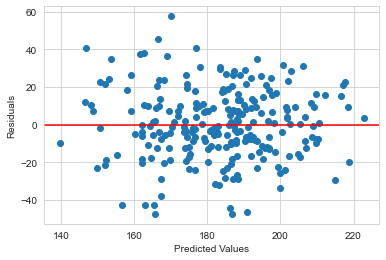

In [178]:
plt.scatter(y_pred, y_test - y_pred)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()



In [179]:
print(modellasso.coef_)


[ 1.62808515e-01 -1.26970694e+00  0.00000000e+00  6.09620919e-01
  1.78063973e-01 -1.36394775e-02  3.63711436e-01 -1.19512751e+00
 -6.73263506e-01  7.92561576e-01 -9.41702676e-02  1.12131374e-03
  8.16549604e-02 -6.72632625e-01  3.59095660e+00  4.04815575e+00
  9.22946165e-02]


In [180]:
print(modellasso.intercept_)


180.5629349562884


In [181]:
from sklearn.metrics import r2_score

In [182]:
r_squared = r2_score(y_test, y_pred)


In [183]:
n = X_test.shape[0]
k = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - k - 1)

print("Adjusted R-squared:", adjusted_r_squared)


Adjusted R-squared: 0.3841103700391457
